<a href="https://colab.research.google.com/github/Dimisz/Portfolio/blob/main/Python/DeepLearning/TensorFlow/ComputerVision/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Identification: Multiclass Classification.


In [1]:
# imports 
from matplotlib.pyplot import imread
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os

## 1. Data

Data is downloaded [from Kaggle](https://www.kaggle.com/c/dog-breed-identification/data). The data file is too big to put it into GitHub repo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !unzip -q "/content/drive/MyDrive/DogVision/dog-breed-identification.zip" -d "/content/drive/MyDrive/DogVision/unpacked"

### Prepare the data 

In [4]:
# Check the labels
labels_csv = pd.read_csv("/content/drive/MyDrive/DogVision/unpacked/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     42151bfbe47dce2c5ac2d53860f66f4f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


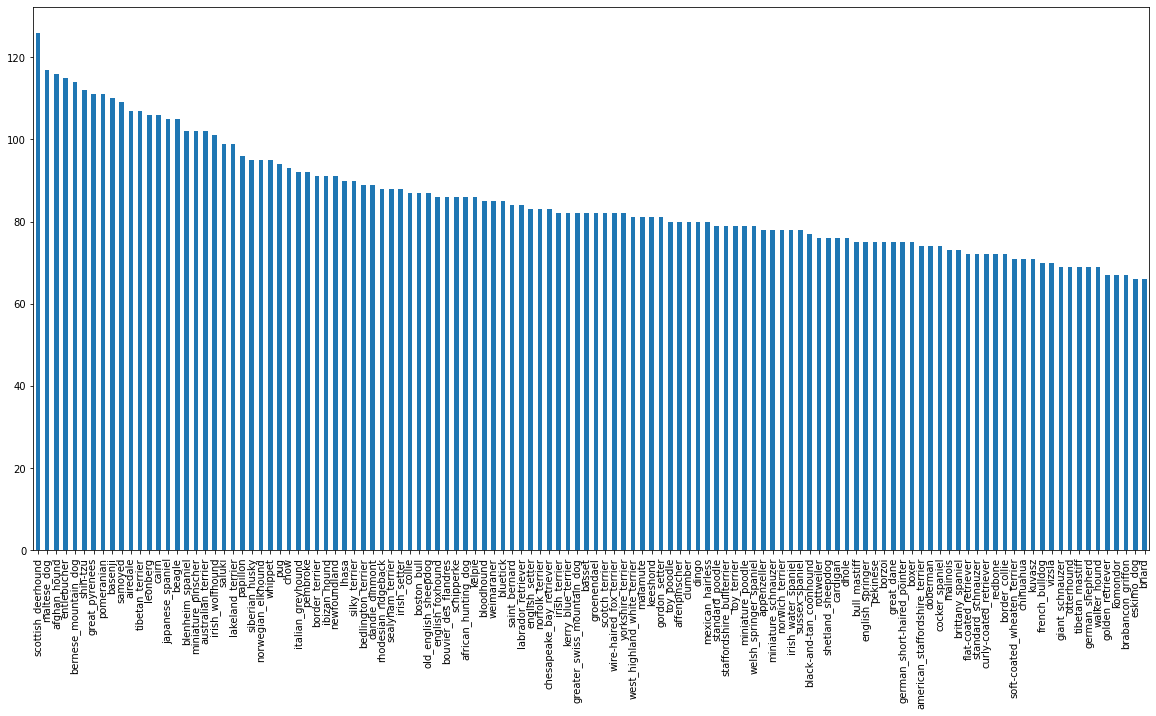

In [5]:
# How many images are there per each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [6]:
# Explore how balanced is the dataset
labels_csv['breed'].value_counts().min(), labels_csv['breed'].value_counts().max(), labels_csv['breed'].value_counts().mean(),  

(66, 126, 85.18333333333334)

For image classification at least 10 images per label needed.

Our dataset fulfills the requirement, it could be better though, since 100 images per label is recommended.

### Prepare the images

In [7]:
from IPython.display import Image

In [8]:
# Commented out to save storage space in GitHub
# Uncomment to see the image 

# Image("drive/MyDrive/DogVision/unpacked/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

#### Get a list of all of our images pathnames

In [9]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [10]:
# Pathnames for images ids
filenames = ["drive/MyDrive/DogVision/unpacked/train/"+fname+".jpg" for fname in labels_csv['id']]
filenames[:10]

['drive/MyDrive/DogVision/unpacked/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/unpacked/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/unpacked/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/unpacked/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/unpacked/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/unpacked/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/unpacked/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/unpacked/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/unpacked/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/unpacked/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
# Check whether number of filenames matched number of actual image files
if len(os.listdir("drive/MyDrive/DogVision/unpacked/train/")) == len(filenames):
  print("Filenames match actual amount of files! Proceed!")
else:
  print("Filenames do not match actual amount of files. Check the target directory.")

Filenames match actual amount of files! Proceed!


In [12]:
# Manual check
# Commented out to save storage space in GitHub
# Uncomment to see the image 

#Image(filenames[9000])

In [13]:
labels_csv["breed"][9000]

'tibetan_mastiff'

### Convert the labels into numbers

In [14]:
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [16]:
# Compare the number of labels to the number of filenames
if len(labels) == len(filenames):
  print("Equal")
else:
  print("Not equal")

Equal


In [17]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

### Create our own validation set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = filenames
y = boolean_labels

We're going to start with 1000 images

In [22]:
# Set nnumber of images to use for experimenting

NUM_IMAGES = 1000 #@param {type: "slider", min: 1000, max:10000, step:1000}

In [23]:
# Split our data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

In [24]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [25]:
X_train[:2], y_train[:2]

(['drive/MyDrive/DogVision/unpacked/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DogVision/unpacked/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

### Convert images into tensors

1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable `jpg image`
3. Turn the `jpg image` into tensors
4. Normalize the image
5. Resize the `jpg image` into (224, 224)
6. Return the modified image

In [26]:
# Convert an image into a numpy array
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [27]:
# Turn image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [28]:
# Make a function to preprocess images
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image filepath and turns an image into a tensor
  """
  # read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpg image into numerical tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to the target image size (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

### Create batches

In [29]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label
  Processes the image and returns a tuple of (image, label)
  """
  
  image = process_image(image_path)

  return image, label

In [30]:
# Try of the function
try_index = random.randint(0,len(X)-1)
try_result = get_image_label(X[try_index], y[try_index])
try_result

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.8883667 , 0.904053  , 0.90797454],
         [0.8863102 , 0.9019965 , 0.90591806],
         [0.8957021 , 0.9113884 , 0.91530997],
         ...,
         [0.94276106, 0.94668263, 0.9270748 ],
         [0.9374213 , 0.9413429 , 0.92173505],
         [0.93850654, 0.94117653, 0.9278266 ]],
 
        [[0.901812  , 0.9174983 , 0.92141986],
         [0.89405835, 0.9097446 , 0.9136662 ],
         [0.8957021 , 0.9113884 , 0.91530997],
         ...,
         [0.9401579 , 0.94407946, 0.9244716 ],
         [0.9435906 , 0.94751215, 0.9279043 ],
         [0.94289297, 0.94556296, 0.932213  ]],
 
        [[0.9058824 , 0.9215687 , 0.92549026],
         [0.897873  , 0.91355926, 0.9174808 ],
         [0.88861173, 0.904298  , 0.9082196 ],
         ...,
         [0.9388395 , 0.94276106, 0.9231532 ],
         [0.9410102 , 0.94493175, 0.9253239 ],
         [0.9415222 , 0.9441922 , 0.9308422 ]],
 
        ...,
 
        [[0.8940283 , 0.9175577 

Apply the above functions to make all of our data into batches

In [31]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (that doesn't have labels).
  """
  if test_data: # no labels here
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  # If the data is a valid dataset we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch
  
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mmapping image processor function
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples
    data = data.map(get_image_label)

    # Turn the training data into batches 
    data_batch = data.batch(batch_size)
    return data_batch



In [32]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [33]:
# Check out the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing Data Batches

In [34]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridlines off
    plt.axis("off")

In [35]:
train_images, train_labels = next(train_data.as_numpy_iterator())

len(train_images), len(train_labels)

(32, 32)

In [36]:
# Visualize training set

# Commented out to save storage space in GitHub
# Uncomment to see the image 

# show_25_images(train_images, train_labels)

In [37]:
# Visualize validation set

# Commented out to save storage space in GitHub
# Uncomment to see the image 

# val_images, val_labels = next(val_data.as_numpy_iterator())
# show_25_images(val_images, val_labels)

## Building a model

We are going to use transfer learning here.

In [38]:
# Setup the input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color-channels

# Setup the output shape
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Create a function that:
* Takes input shape, output shape and the model as parameters.
* Defines the layers (Sequential model).
* Compiles the model.
* Build the model.
* Returns a model.


In [39]:
import tensorflow_hub as hub

### `create_model()` function

In [40]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(model_url), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=output_shape, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [41]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Create callbacks (TensorBoard & EarlyStopping)

#### TensorBoard callback

In [42]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [43]:
import datetime

# Function to build a tensorboard ccallback
def create_tensorboard_callback():
  # Create a log directory for storing TennsorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/DogVision/logs",
                        #logs will be traacked every time we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

#### EarlyStopping Callback

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Train the model (on a subset of data)

In [45]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [46]:
print("GPU", "available (YES)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YES)


In [47]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create a model
  model = create_model()

  # Create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [48]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 110s 3s/step - loss: 4.6074 - accuracy: 0.1050 - val_loss: 3.5619 - val_accuracy: 0.2150
Epoch 2/100
25/25 [==============================] - 4s 179ms/step - loss: 1.6920 - accuracy: 0.6700 - val_loss: 2.2508 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 4s 160ms/step - loss: 0.5775 - accuracy: 0.9375 - val_loss: 1.7475 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 5s 179ms/step - loss: 0.2581 - accuracy: 0.9812 - val_loss: 1.5428 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 5s 179ms/step - loss: 0.1484 - accuracy: 0.9975 - val_loss: 1.4728 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 4s 165ms/step - loss: 0.1020 - accuracy: 1.0000 - val_loss: 1.4327 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================]

### Checking the tensorboard logs

The TensorBoard magic function (`%tensorboard`) will access the logs direcctory and visualize its contents

In [49]:
############ NOTE: The tensorboard call commented out to save space in GitHub repo ###########

# %tensorboard --logdir drive/MyDrive/DogVision/logs/20211022-052551

## Making and evaluating predictions using a trained model

In [50]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [51]:
# Make predictions on the validation data (not used for training)

predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 2s 114ms/step


array([[4.31322667e-04, 2.19585854e-04, 2.72379396e-03, ...,
        4.31160443e-04, 1.57005183e-04, 1.02290651e-02],
       [1.90067757e-03, 2.01729854e-04, 6.00569881e-03, ...,
        4.42465185e-04, 7.32775428e-04, 9.72867492e-05],
       [1.38009898e-04, 9.89615583e-05, 4.95505985e-04, ...,
        5.59427244e-05, 9.06740315e-05, 2.56382511e-03],
       ...,
       [6.53389407e-06, 4.34846443e-05, 6.49423746e-05, ...,
        9.28153668e-07, 1.81098512e-05, 1.12682146e-05],
       [5.50728757e-03, 4.60808486e-04, 1.88565216e-04, ...,
        1.19834156e-04, 1.03951505e-04, 2.24986672e-03],
       [2.71189405e-04, 6.45828331e-05, 2.09199381e-03, ...,
        5.05977077e-03, 6.78215059e-04, 8.08442710e-04]], dtype=float32)

In [52]:
predictions.shape

(200, 120)

In [53]:
len(y_val)

200

In [54]:
len(unique_breeds)

120

In [55]:
# Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  return unique_breeds[tf.argmax(prediction_probabilities)]

In [56]:
pred_label = get_pred_label(predictions[0])
pred_label

'cairn'

In [57]:
# Create a function to unbatch a batch dataset
def unbatchify(data_set):
  """
  Takes a batched dataset of (image, label) tensors and returns separate arrays of images and labels.
  """
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data_set.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  
  return images, labels 


In [58]:
val_images, val_labels = unbatchify(val_data)

### Make a function to view a prediction 

* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.

* Converts the prediction probabilities to a predicted label.

* Plots the predicted label, its predicted probability, the truth label and a target image on a single plot.

In [59]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending if predicction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  # Change plot title to be (predicted, probability of prediction and truth label)
  plt.title("{} {:2.0f}% {}".format(pred_label, 
                                  np.max(pred_prob)*100,
                                  true_label), color=color)
  

In [60]:
############ NOTE: The plotting function call commented out to save space in GitHub repo ###########

# plot_pred(prediction_probabilities=predictions, 
#           labels=val_labels,
#           images=val_images,
#           n=77)

### Make a function to view top 10 predictions

* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.

* Converts the prediction probabilities to a predicted label.

* Find the top 10:
  - Prediction probabilities indeces
  - Prediction probabilities values
  - Prediction labels
* Plot the top 10 prediction probabilities values and labels, coloring the true label green

In [61]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indeces
  top_10_pred_indeces = pred_prob.argsort()[-10:][::-1]

  # Find top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indeces]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indeces]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  #print(f"true label:{true_label}")
  #print(f"top_10: {top_10_pred_labels}")
  if np.isin(true_label, top_10_pred_labels):
    #print("in")
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


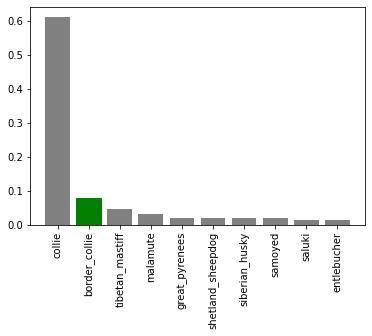

In [62]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [65]:
# Checkout a few predictions and their different values
############ NOTE: The plotting loop commented out to save space in GitHub repo ###########


# i_multiplier = 20
# num_rows = 3
# num_cols = 2
# num_images = num_rows * num_cols
# plt.figure(figsize=(10*num_cols, 5*num_rows))
# for i in range(num_images):
#   plt.subplot(num_rows, 2*num_cols, 2*i + 1)
#   plot_pred(prediction_probabilities=predictions,
#             labels=val_labels,
#             images=val_images,
#             n=i+i_multiplier)
#   plt.subplot(num_rows, 2*num_cols, 2*i+2)
#   plot_pred_conf(prediction_probabilities=predictions,
#                  labels=val_labels,
#                  n=i+i_multiplier)
#   plt.tight_layout()
# plt.tight_layout(h_pad=1.0)
# plt.show()


## Saving a trained model

In [67]:
# Create a funnction to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix.
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/models", 
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [69]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer": hub.KerasLayer})
  return model


In [70]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/models/20211023-09001634979635-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/models/20211023-09001634979635-1000-images-mobilenetv2-Adam.h5'

In [71]:
# Load a ttrained model
loaded_1000_image_model = load_model("/content/drive/MyDrive/models/20211023-09001634979635-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/MyDrive/models/20211023-09001634979635-1000-images-mobilenetv2-Adam.h5...


In [72]:
# Evaluate the presaved model
model.evaluate(val_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.3506 - accuracy: 0.6300


[1.3506280183792114, 0.6299999952316284]

In [73]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 109ms/step - loss: 1.3506 - accuracy: 0.6300


[1.3506280183792114, 0.6299999952316284]

## Training the model on the full dataset

In [74]:
len(X), len(y)

(10222, 10222)

In [75]:
# Create a data batch with full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [76]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [77]:
# Create a model for Full Dataset model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [78]:
full_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              5432713   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [80]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training with full dataset 
# so we cannnot monitor validation accuracy for EarlyStopping
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                              patience=3)

In [81]:
# Fit the full_model
full_model.fit(x=full_data,
               epochs=100,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 834s 3s/step - loss: 1.3420 - accuracy: 0.6722
Epoch 2/100
320/320 [==============================] - 41s 126ms/step - loss: 0.4008 - accuracy: 0.8827
Epoch 3/100
320/320 [==============================] - 40s 125ms/step - loss: 0.2364 - accuracy: 0.9358
Epoch 4/100
320/320 [==============================] - 40s 124ms/step - loss: 0.1545 - accuracy: 0.9627
Epoch 5/100
320/320 [==============================] - 40s 126ms/step - loss: 0.1053 - accuracy: 0.9786
Epoch 6/100
320/320 [==============================] - 41s 126ms/step - loss: 0.0779 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 40s 125ms/step - loss: 0.0596 - accuracy: 0.9910
Epoch 8/100
320/320 [==============================] - 41s 127ms/step - loss: 0.0453 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 41s 127ms/step - loss: 0.0370 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 41s 127ms/

In [82]:
save_model(full_model, suffix="full_image_set_mobilenetv2_Adam")

Saving model to: /content/drive/MyDrive/models/20211023-09501634982638-full_image_set_mobilenetv2_Adam.h5...


'/content/drive/MyDrive/models/20211023-09501634982638-full_image_set_mobilenetv2_Adam.h5'

In [83]:
loaded_full_model = load_model("/content/drive/MyDrive/models/20211023-09501634982638-full_image_set_mobilenetv2_Adam.h5")

Loading saved model from: /content/drive/MyDrive/models/20211023-09501634982638-full_image_set_mobilenetv2_Adam.h5...


## Making predictions on the test dataset

To make prediction on the test data we need to:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (sincce the test data doesn't have labels).
* make a predictions array by passing the test batches to the `predict()` method called on our model.

### 1. Load test image filenames

In [90]:
test_path = "/content/drive/MyDrive/DogVision/test"
test_filenames = [test_path + "/" + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/DogVision/test/ddf2401701ee374c0f1f9dd607071ec7.jpg',
 '/content/drive/MyDrive/DogVision/test/dfe03aa0ae066e09cdda6e7f6e08390a.jpg',
 '/content/drive/MyDrive/DogVision/test/e24b3d1a5a8e001b215f1f692304e8cb.jpg',
 '/content/drive/MyDrive/DogVision/test/e219af838e1d6a18224eb9b478944778.jpg',
 '/content/drive/MyDrive/DogVision/test/e71d9f32ea6eb1c2d944e8f4e811c209.jpg',
 '/content/drive/MyDrive/DogVision/test/deec27ba9446dfe31c0b32586f175d6a.jpg',
 '/content/drive/MyDrive/DogVision/test/e12e6997c15c233c7b92209e08ff9d14.jpg',
 '/content/drive/MyDrive/DogVision/test/e1bc331d2667664376a50f7ff627ec5d.jpg',
 '/content/drive/MyDrive/DogVision/test/e3cec8d0c1876ac36942d35f64b9dfa0.jpg',
 '/content/drive/MyDrive/DogVision/test/e5a78d4d53fc5957cc9dedd318139d3d.jpg']

In [91]:
len(test_filenames)

10357

### 2. Convert the filenames into test data batches

In [92]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [93]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

### 3. Make predictions on test data batch

In [94]:
# Takes about 1 hour
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 942s 3s/step


In [98]:
np.savetxt("/content/drive/MyDrive/DogVision/preds_array.csv", test_predictions, delimiter=",")

In [99]:
test_predictions = np.loadtxt("/content/drive/MyDrive/DogVision/preds_array.csv", delimiter=",")